In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [3]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'homosexual_': {1, 2, 3},
 'deathpen_': {1, 2, 3},
 'hometown_1': {1, 2, 3},
 'gender_1': {1, 2},
 'premaritalsex_': {1, 2, 3},
 'political_': {1, 2, 3},
 'euthanasia_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'gaymarriage_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'age_1': {1, 2}}

In [4]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [5]:
attributes

{1: array([[3., 3., 1., ..., 3., 2., 1.],
        [2., 2., 1., ..., 1., 3., 1.],
        [1., 3., 1., ..., 3., 3., 1.],
        ...,
        [1., 2., 1., ..., 1., 1., 2.],
        [1., 1., 3., ..., 2., 1., 2.],
        [3., 1., 1., ..., 3., 3., 2.]]),
 2: array([[1., 1., 3., ..., 1., 1., 2.],
        [1., 1., 1., ..., 1., 1., 2.],
        [3., 2., 1., ..., 3., 1., 1.],
        ...,
        [3., 2., 1., ..., 3., 1., 1.],
        [3., 3., 2., ..., 3., 1., 1.],
        [3., 1., 1., ..., 3., 1., 1.]]),
 3: array([[3., 1., 2., 2., 3., 2., 3., 3., 1., 3., 1., 1.],
        [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 3., 2.],
        [3., 3., 1., 2., 3., 3., 3., 1., 3., 3., 3., 1.],
        [3., 1., 1., 1., 3., 1., 3., 3., 1., 3., 2., 2.],
        [1., 1., 1., 2., 1., 2., 3., 3., 2., 3., 1., 1.],
        [3., 1., 2., 1., 3., 1., 2., 1., 1., 3., 2., 1.],
        [3., 1., 2., 2., 3., 3., 2., 3., 1., 3., 1., 2.],
        [3., 1., 1., 1., 1., 

In [6]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'homosexual_', 'deathpen_', 'political_', 'premaritalsex_', 'euthanasia_', 'abortion_', 'gaymarriage_', 'marijuana_'}
{1: array([[3., 3., 1., 3., 3., 3., 3., 2.],
       [2., 2., 1., 2., 2., 2., 1., 3.],
       [1., 3., 3., 3., 3., 3., 3., 3.],
       [3., 1., 3., 3., 1., 3., 3., 2.],
       [3., 2., 2., 3., 1., 3., 2., 1.],
       [1., 1., 2., 1., 3., 1., 1., 1.],
       [2., 2., 1., 1., 1., 1., 2., 1.],
       [1., 2., 2., 1., 2., 2., 2., 3.],
       [3., 1., 2., 3., 3., 3., 3., 2.],
       [3., 1., 3., 3., 1., 1., 3., 3.],
       [1., 1., 2., 1., 3., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 2., 1.],
       [3., 1., 1., 3., 2., 1., 3., 3.],
       [2., 1., 1., 1., 1., 1., 1., 3.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [2., 1., 1., 2., 3., 1., 1., 2.],
       [1., 2., 1., 3., 2., 1., 1., 2.],
       [1., 3., 1., 1., 3., 1., 1., 3.],
       [3., 2., 3., 2., 3., 3., 3., 3.],
       [1., 1., 1., 3., 3., 1., 3., 3.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [3., 1., 

# Calc link polarity

In [7]:
def calc_link_polarity(agent1, agent2, th, attr_dif):
    return np.sum(np.abs(agent1 - agent2) / attr_dif ) / len(agent1) <= th

def calc_link_polarities(agents, th, attr_dif):
    N, A = agents.shape
    
    polarities = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if calc_link_polarity(agents[i,:], agents[j,:], th, attr_dif):
                polarities[i,j] = 1 
            else:
                polarities[i,j] = -1
            polarities[j,i] = polarities[i, j]
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [8]:
a1 = np.array([0,0,0])
a2 = np.array([1,1,1])

calc_link_polarity(a1, a2, 0.35, 2 ), calc_link_polarity(a1, a1, 0.5, 2)

(False, True)

In [9]:
a = np.zeros([3,3])
a[0,1] = 1
a[0,2] = 1
a[1,2] = -1
a[1,0] = 1
a[2,0] = 1
a[2,1] = -1

balanced_triad_density(a)

0.0

In [10]:
polarities = calc_link_polarities(ord_attributes[1], 0.5, 2)

In [11]:
polarities

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0., -1.],
       [ 1.,  1.,  1., ..., -1., -1.,  0.]])

In [12]:
balanced_triad_density(polarities)

0.7293682937092363

# Calc balanced triads in network

In [13]:
data[1].nodes

NodeView((75178, 30952, 13116, 62555, 26999, 10841, 17353, 86352, 53275, 77291, 18394, 36006, 57637, 71627, 75261, 19844, 25323, 40997, 52635, 45945, 72746, 15071, 46771, 29914, 52067, 37617, 30076, 71700, 19066, 51675, 63188, 79877, 14106, 76313, 82282, 85596, 10060, 75468, 46021, 23642, 50869, 68633, 18420, 68494, 39783, 21350, 66404, 85970, 59367, 13799, 62560, 16495, 34853, 67947, 50709, 70889, 86727, 45539, 14188, 89827, 11692, 82060, 66754, 66245, 46654, 32174, 58909, 25947, 34250, 18344, 38823, 22745, 26127, 38893, 31372, 68533, 31583, 49597, 73303, 46160, 25544, 51597, 49294, 51722, 66052, 53884, 51552, 80058, 10281, 45292, 32899, 26425, 78911, 23144, 44520, 50181, 88175, 63063))

In [14]:
for i, node in enumerate(data[1].nodes):
    print(node)
    if i > 10:
        break

75178
30952
13116
62555
26999
10841
17353
86352
53275
77291
18394
36006


Above was a test of order of nodes in networkx. So I assume that the order of adjacency matrix and the attribute matrix are equal. 

In [15]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [16]:
triads = get_triads(data[1])

s_mul, s_add = get_triads_strength(triads, data[1])

s_mul, s_add

(array([3.5200000e+02, 4.0000000e+01, 9.4184000e+04, 1.8335000e+04,
        1.6000000e+01, 2.4000000e+01, 1.4288400e+05, 2.6615520e+06,
        2.6805600e+05, 1.8907200e+05, 5.8752000e+04, 1.3065360e+06,
        1.6454200e+05, 3.2168500e+05, 7.3447200e+05, 4.9449600e+05,
        2.2624000e+04, 2.9492000e+04, 1.7952000e+04, 9.7831800e+05,
        3.8005200e+05, 2.7378000e+05, 1.4580000e+03, 2.3058000e+04,
        1.7128800e+05, 1.4054400e+05, 4.9600000e+02, 2.1216000e+04,
        4.0000000e+00, 6.6000000e+02, 7.7220000e+04, 1.1960000e+04,
        1.5929584e+07, 6.7001600e+05, 1.1092000e+05, 1.1804000e+05,
        3.1680000e+04, 5.9464920e+06, 3.9153400e+05, 4.0144380e+06,
        2.9568000e+04, 5.1282000e+04, 2.7283200e+06, 1.0851360e+06,
        1.9760000e+04]),
 array([  23.,   11.,  262.,  217.,   11.,   15.,  166.,  623.,  211.,
         189.,  119.,  519.,  168.,  215.,  523.,  479.,  422.,  178.,
         143.,  330.,  229.,  198.,   92.,  208.,  253.,  239.,  128.,
         158.,

In [17]:
A = nx.adjacency_matrix(data[1]).todense() 

N = A.shape[0]

triads = []

for i in range(0,N):
    for j in range(i+1,N):
        if A[i,j] > 0:
            for k in range(j+1,N):
                if A[i,k] > 0 and A[j,k] > 0:
                    triads.append((i,j,k))
len(triads)

45

In [18]:
np.trace(np.linalg.matrix_power((A>0)*1,3))/6

45.0

In [19]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [43]:
polarities = calc_link_polarities(ord_attributes[1], 0.5, 2)

t_pol, t_pol_type = get_triads_polarity(polarities, triads)

t_pol, t_pol_type

(array([-1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        -1.,  1.,  1., -1.,  1.,  1.]),
 array([1., 0., 2., 1., 1., 0., 2., 0., 0., 0., 0., 2., 1., 2., 0., 0., 2.,
        0., 2., 2., 1., 2., 2., 1., 0., 0., 2., 0., 0., 2., 2., 1., 2., 2.,
        1., 1., 0., 0., 2., 1., 2., 0., 1., 2., 2.]))

In [31]:
triads_type = count_triads_types(polarities, triads)
triads_type

[9, 5, 23, 8]

In [41]:
ord_attributes[1][0:3]

array([[3., 3., 1., 3., 3., 3., 3., 2.],
       [2., 2., 1., 2., 2., 2., 1., 3.],
       [1., 3., 3., 3., 3., 3., 3., 3.]])

In [34]:
balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.7555555555555555, 0.7293682937092363)

In [19]:
T = len(triads)
dens = 0.
for triad in triads:
    i, j, k = triad
#     print(polarities[i,j])
    if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
        dens = dens + 1
dens = dens / T
dens

0.7555555555555555

# Correlation link - polarity

In [106]:
sem = 6

A = nx.adjacency_matrix(data[sem]).todense() 
polarities = calc_link_polarities(ord_attributes[sem], 0.5, 2)

N = A.shape[0]

linkpol = np.empty((0,2), dtype=np.int16)

for i in range(0,N):
    for j in range(i+1,N):
        if A[i,j] > 0:
            linkpol = np.append(linkpol, [[polarities[i,j], A[i,j]]], axis=0)
linkpol

array([[-1.000e+00,  6.380e+02],
       [ 1.000e+00,  1.400e+01],
       [ 1.000e+00,  3.100e+01],
       [-1.000e+00,  1.230e+02],
       [ 1.000e+00,  2.000e+00],
       [ 1.000e+00,  2.560e+02],
       [-1.000e+00,  9.310e+02],
       [ 1.000e+00,  1.300e+02],
       [-1.000e+00,  8.000e+00],
       [ 1.000e+00,  1.000e+00],
       [ 1.000e+00,  1.230e+02],
       [ 1.000e+00,  1.900e+01],
       [-1.000e+00,  8.600e+01],
       [ 1.000e+00,  6.000e+00],
       [-1.000e+00,  6.000e+00],
       [ 1.000e+00,  1.300e+01],
       [ 1.000e+00,  3.900e+01],
       [-1.000e+00,  9.000e+00],
       [ 1.000e+00,  4.000e+00],
       [ 1.000e+00,  8.600e+01],
       [-1.000e+00,  1.000e+00],
       [ 1.000e+00,  6.000e+00],
       [-1.000e+00,  4.000e+00],
       [ 1.000e+00,  1.000e+00],
       [-1.000e+00,  1.000e+00],
       [ 1.000e+00,  4.000e+00],
       [ 1.000e+00,  8.000e+00],
       [ 1.000e+00,  7.400e+01],
       [ 1.000e+00,  6.000e+00],
       [ 1.000e+00,  2.500e+01],
       [ 1

In [100]:
els = linkpol.shape[0]
pos_linkpol = np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == 1.])
neg_linkpol = np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == -1.])

(618.5, 0.09529487951669185)

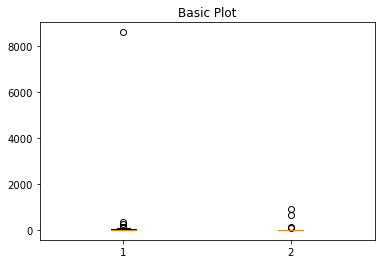

In [101]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([pos_linkpol, neg_linkpol])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(pos_linkpol, neg_linkpol, alternative = 'greater')

U1, p

In [102]:
np.mean(pos_linkpol), np.mean(neg_linkpol)

(219.70212765957447, 84.31818181818181)

In [103]:
np.std(pos_linkpol), np.std(neg_linkpol)

(1237.9170376576665, 227.69225370375298)

In [104]:
np.median(pos_linkpol), np.median(neg_linkpol)

(10.0, 4.5)

In [212]:
def compare_weighted_links(net, polarities):
    A = nx.adjacency_matrix(net).todense() 
    
    N = A.shape[0]

    linkpol = np.empty((0,2), dtype=np.int16)

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                linkpol = np.append(linkpol, [[polarities[i,j], A[i,j]]], axis=0)
    els = linkpol.shape[0]
    pos_linkpol = np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == 1.])
    neg_linkpol = np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == -1.])
    
    U1, p = mannwhitneyu(pos_linkpol, neg_linkpol, alternative = 'greater')
    
    return U1, p

In [252]:
sem = 6

net = data[sem]
polarities = calc_link_polarities(ord_attributes[sem], 0.5, 2)

compare_weighted_links(net, polarities)

(618.5, 0.09529487951669185)

In [222]:
def gather_all_links(data, ord_attributes, th, attr_dif):
    all_pos_linkpol = np.empty(0)
    all_neg_linkpol = np.empty(0)
    
    for sem in range(1,7):
        A = nx.adjacency_matrix(data[sem]).todense() 
        polarities = calc_link_polarities(ord_attributes[sem], th, attr_dif)

        N = A.shape[0]

        linkpol = np.empty((0,2), dtype=np.int16)

        for i in range(0,N):
            for j in range(i+1,N):
                if A[i,j] > 0:
                    linkpol = np.append(linkpol, [[polarities[i,j], A[i,j]]], axis=0)
        
        els = linkpol.shape[0]
        all_pos_linkpol = np.append(all_pos_linkpol, np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == 1.]))
        all_neg_linkpol = np.append(all_neg_linkpol, np.array([linkpol[ind,1] for ind in range(0,els) if linkpol[ind,0] == -1.]))
        
    return all_pos_linkpol, all_neg_linkpol

def compare_all_weighted_links(data, ord_attributes, th, attr_dif):
    all_pos_linkpol, all_neg_linkpol = gather_all_links(data, ord_attributes, 0.5, 2)
    
    return mannwhitneyu(all_pos_linkpol, all_neg_linkpol, alternative = 'greater')

In [210]:
all_pos_linkpol, all_neg_linkpol = gather_all_links(data, ord_attributes, 0.5, 2)

(39383.0, 0.2225959827884968)

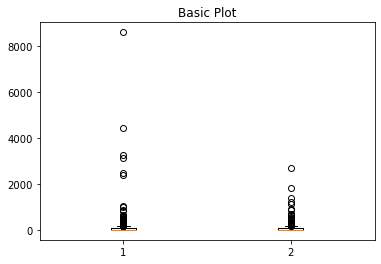

In [211]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([all_pos_linkpol, all_neg_linkpol])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(all_pos_linkpol, all_neg_linkpol, alternative = 'greater')

U1, p

# Correlation triad strength - triad balance/type

In [281]:
sem = 6

triads = get_triads(data[sem])

s_mul, s_add = get_triads_strength(triads, data[sem])

s_mul, s_add

(array([1.0986360e+06, 3.0381000e+04, 2.8782000e+04, 1.4706000e+04,
        4.5600000e+02, 2.0280000e+03, 2.5000000e+01, 4.5291456e+07,
        4.2000000e+02, 6.6600000e+02, 1.4400000e+02, 1.3800000e+03]),
 array([ 775.,  155.,  168.,  114.,   29.,   56.,   27., 8949.,   33.,
          56.,   24.,  123.]))

In [282]:
polarities = calc_link_polarities(ord_attributes[sem], 0.5, 2)

t_pol, t_pol_type = get_triads_polarity(polarities, triads)

t_pol, t_pol_type

(array([ 1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.]),
 array([2., 0., 0., 2., 0., 0., 1., 0., 1., 2., 2., 2.]))

In [283]:
Ts = len(triads)
bal_mul = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == 1.])
unbal_mul = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == -1.])
bal_add = np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == 1.])
unbal_add = np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == -1.])

bal_mul, unbal_mul, bal_add, unbal_add

(array([1.0986360e+06, 3.0381000e+04, 2.8782000e+04, 1.4706000e+04,
        4.5600000e+02, 2.0280000e+03, 4.5291456e+07, 6.6600000e+02,
        1.4400000e+02, 1.3800000e+03]),
 array([ 25., 420.]),
 array([ 775.,  155.,  168.,  114.,   29.,   56., 8949.,   56.,   24.,
         123.]),
 array([27., 33.]))

(19.0, 0.03391813258625835)

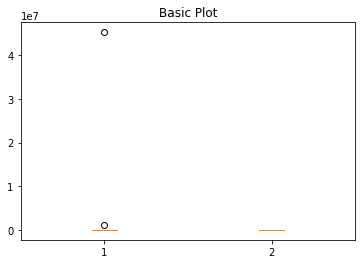

In [284]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([bal_mul, unbal_mul])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(bal_mul, unbal_mul, alternative = 'greater')

U1, p

(17.0, 0.08092572632599931)

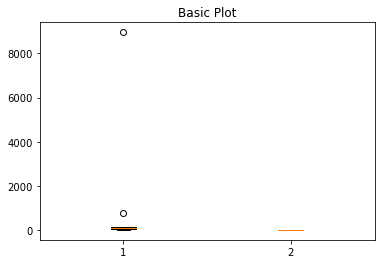

In [285]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([bal_add, unbal_add])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(bal_add, unbal_add, alternative = 'greater')

U1, p

In [240]:
def gather_all_strengths(data, ord_attributes, th, attr_dif):
    all_bal_add = np.empty(0)
    all_unbal_add = np.empty(0)
    all_bal_mul = np.empty(0)
    all_unbal_mul = np.empty(0)
    
    for sem in range(1,7):
        triads = get_triads(data[sem])
        s_mul, s_add = get_triads_strength(triads, data[sem])
        polarities = calc_link_polarities(ord_attributes[sem], th, attr_dif)
        t_pol, t_pol_type = get_triads_polarity(polarities, triads)
        
        Ts = len(triads)
        all_bal_mul = np.append(all_bal_mul, np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == 1.]))
        all_unbal_mul = np.append(all_unbal_mul, np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == -1.]))
        all_bal_add = np.append(all_bal_add, np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == 1.]))
        all_unbal_add = np.append(all_unbal_add, np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == -1.]))

    return all_bal_mul, all_unbal_mul, all_bal_add, all_unbal_add

In [241]:
all_bal_mul, all_unbal_mul, all_bal_add, all_unbal_add = gather_all_strengths(data, ord_attributes, 0.5, 2)

(2014.5, 0.15033052929905966)

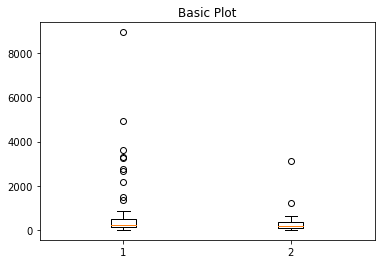

In [242]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([all_bal_add, all_unbal_add])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(all_bal_add, all_unbal_add, alternative = 'greater')

U1, p

(2091.5, 0.0790024090959543)

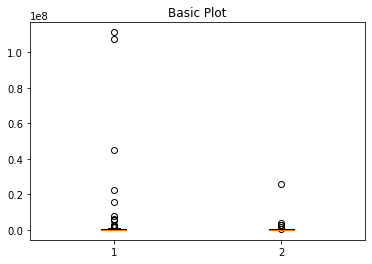

In [243]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([all_bal_mul, all_unbal_mul])

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(all_bal_mul, all_unbal_mul, alternative = 'greater')

U1, p

# Attribute randomization

Randomization of all attributes

In [151]:
import random
a = list(range(0,5))
random.shuffle(a)
a

[4, 2, 1, 3, 0]

In [200]:
x = np.zeros([3,3])
x[0,1] = 1
x[0,2] = 2
x[1, 0] = 10
x[1,1] = 11
x[1,2] = 12
x[2,0] = 20
x[2,2] = 22
np.random.shuffle(x)
x

array([[10., 11., 12.],
       [ 0.,  1.,  2.],
       [20.,  0., 22.]])

In [223]:
def randomize_all_attributes(attr):
    N, A = attr.shape
    
    attr_rand = np.copy(attr)
    np.random.shuffle(attr_rand)
    
    return attr_rand

def randomize_attribute_sets(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem])
    
    return rand_ord_attributes

def compare_bal_triads(triads, agents, th, attr_dif, M):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands >= bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = ord_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [283]:
bal_dens_rands, bal_dens = compare_bal_triads(triads, agents, 0.3, 2, 100)

IndexError: index 94 is out of bounds for axis 1 with size 89

In [260]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens

(33, 0.010444444444444433)

In [162]:
compare_networks(data, 0.5, 2, 100)

(array([52., 30., 66., 76., 33., 41.]),
 array([0.75555556, 0.76923077, 0.66666667, 0.65384615, 0.8       ,
        0.83333333]),
 array([ 0.00066667,  0.07423077,  0.00333333, -0.05961538,  0.086     ,
         0.06166667]),
 array([0.00024845, 0.02761556, 0.02739146, 0.03876855, 0.04940933,
        0.05109835]))

In [230]:
n = 2
net = data[n]
triads = get_triads(net)
agents = ord_attributes[n]

In [220]:
sem = 6
net = data[sem]
agents = ord_attributes[sem]

U_rands, pval_rands, pval_U, pval_pval = compare_weighted_network(net, agents, 0.5, 2, 100)

U_rands, pval_rands, pval_U, pval_pval

(array([642. , 613.5, 546.5, 509. , 439.5, 660.5, 512. , 552.5, 543.5,
        457.5, 623.5, 472.5, 593.5, 484. , 452.5, 557.5, 213. , 494. ,
        506.5, 663.5, 656.5, 547.5, 484.5, 407.5, 670.5, 425. , 589.5,
        669.5, 525. , 398. , 545. , 543.5, 464.5, 630.5, 652. , 562.5,
        516. , 427.5, 482.5, 390. , 522. , 632.5, 522.5, 573.5, 654.5,
        564.5, 453. , 530.5, 598. , 615.5, 531. , 493. , 522. , 608.5,
        476. , 627.5, 511. , 647.5, 499.5, 430.5, 480.5, 532.5, 723.5,
        511.5, 561.5, 589. , 466. , 548. , 523.5, 527. , 522. , 575. ,
        497.5, 598.5, 627. , 489.5, 496. , 436.5, 420. , 473. , 637.5,
        638.5, 472.5, 480. , 425.5, 747.5, 410. , 407.5, 530.5, 450. ,
        478. , 566. , 549. , 691. , 531.5, 565. , 681. , 658. , 612.5,
        485.5]),
 array([0.15193917, 0.14093678, 0.63471182, 0.7654339 , 0.84394023,
        0.08347971, 0.3873675 , 0.20460546, 0.12399063, 0.22322363,
        0.21255228, 0.72010214, 0.1623447 , 0.60605794, 0.75253594

In [227]:
compare_weighted_networks(data, ord_attributes, 0.5, 2, 100)

(array([40485. , 42809.5, 43979. , 39322. , 40810. , 40244. , 43141. ,
        42746. , 44857. , 43271. , 44030.5, 43323. , 43330.5, 39207.5,
        41567.5, 43457.5, 44440.5, 40725. , 40153.5, 45312. , 38783.5,
        44150.5, 38959. , 40078. , 41019.5, 41991. , 42169. , 37062. ,
        40779.5, 45727.5, 38904. , 41130.5, 41404.5, 40429. , 39889.5,
        39635. , 40865.5, 41921. , 44096. , 39269.5, 42795.5, 37863. ,
        42343. , 40374. , 41428. , 41053.5, 42573.5, 41316.5, 43310. ,
        36436.5, 40842. , 38404. , 41842. , 42619.5, 41812.5, 43874. ,
        40508.5, 42201.5, 41215.5, 38132.5, 41746.5, 37374. , 40477.5,
        42744. , 44745. , 43100. , 37372.5, 42624. , 39467.5, 42564.5,
        42340. , 39721.5, 41393.5, 41935.5, 38128.5, 41308.5, 39842. ,
        41992.5, 39573. , 44461.5, 42676. , 46520.5, 43755.5, 43283. ,
        40639. , 39113. , 44228.5, 40037. , 43447.5, 41765. , 40614. ,
        42759.5, 38679. , 43552. , 41731.5, 41626.5, 41325.5, 41314. ,
      

In [244]:
def compare_weighted_triads_net_sep(net, agents, th, attr_dif, M):
    triads = get_triads(net)
    s_mul, s_add = get_triads_strength(triads, net)
    Ts = len(triads)
    
    polarities = calc_link_polarities(agents, th, attr_dif)
    
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    bal_mul = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == 1.])
    unbal_mul = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol[ind] == -1.])
    bal_add = np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == 1.])
    unbal_add = np.array([s_add[ind] for ind in range(0,Ts) if t_pol[ind] == -1.])
    
    Umul_data, pmul_data = mannwhitneyu(bal_mul, unbal_mul, alternative = 'greater')
    Uadd_data, padd_data = mannwhitneyu(bal_add, unbal_add, alternative = 'greater')
    
    Uadd_rands = np.zeros(M)
    padd_rands = np.zeros(M)
    Umul_rands = np.zeros(M)
    pmul_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities(agents_rand, th, attr_dif)
        
        t_pol_rand, t_pol_type_rand = get_triads_polarity(polarities_rand, triads)

        bal_mul_rand = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol_rand[ind] == 1.])
        unbal_mul_rand = np.array([s_mul[ind] for ind in range(0,Ts) if t_pol_rand[ind] == -1.])
        bal_add_rand = np.array([s_add[ind] for ind in range(0,Ts) if t_pol_rand[ind] == 1.])
        unbal_add_rand = np.array([s_add[ind] for ind in range(0,Ts) if t_pol_rand[ind] == -1.])
        
        Umul_rands[i], pmul_rands[i] = mannwhitneyu(bal_mul_rand, unbal_mul_rand, alternative = 'greater')
        Uadd_rands[i], padd_rands[i] = mannwhitneyu(bal_add_rand, unbal_add_rand, alternative = 'greater')
    
    padd_U = np.sum(Uadd_rands >= Uadd_data)
    padd_pval = np.sum(padd_rands <= padd_data)
    
    pmul_U = np.sum(Umul_rands >= Umul_data)
    pmul_pval = np.sum(pmul_rands <= pmul_data)
    
    return pmul_U, pmul_pval, padd_U, padd_pval

def compare_weighted_triads_nets(data, ord_attributes, th, attr_dif, M):
    all_bal_mul, all_unbal_mul, all_bal_add, all_unbal_add = gather_all_strengths(data, ord_attributes, 0.5, 2)
    
    Umul_data, pmul_data = mannwhitneyu(all_bal_mul, all_unbal_mul, alternative = 'greater')
    Uadd_data, padd_data = mannwhitneyu(all_bal_add, all_unbal_add, alternative = 'greater')
    
    Uadd_rands = np.zeros(M)
    padd_rands = np.zeros(M)
    Umul_rands = np.zeros(M)
    pmul_rands = np.zeros(M)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        all_bal_mul_rand, all_unbal_mul_rand, all_bal_add_rand, all_unbal_add_rand = gather_all_strengths(data, rand_ord_attributes, 0.5, 2)
        
        Umul_rands[i], pmul_rands[i] = mannwhitneyu(all_bal_mul_rand, all_unbal_mul_rand, alternative = 'greater')
        Uadd_rands[i], padd_rands[i] = mannwhitneyu(all_bal_add_rand, all_unbal_add_rand, alternative = 'greater')
    
    padd_U = np.sum(Uadd_rands >= Uadd_data)
    padd_pval = np.sum(padd_rands <= padd_data)
    
    pmul_U = np.sum(Umul_rands >= Umul_data)
    pmul_pval = np.sum(pmul_rands <= pmul_data)
    
    return pmul_U, pmul_pval, padd_U, padd_pval

In [259]:
sem = 6
net = data[sem]
agents = ord_attributes[sem]

compare_weighted_triads_net_sep(net, agents, 0.5, 2, 100)

/home/pgorski/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


(21, 4, 27, 10)

In [260]:
compare_weighted_triads_nets(data, ord_attributes, 0.5, 2, 1000)

(238, 86, 344, 168)